 **Atividade 2.5 - Hamilton Celerino da Fonseca Neto**

# Import e dataset

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_iris

import torch
from torch import nn, optim
from torch.autograd import Variable

torch.manual_seed(1234)

In [72]:
iris = load_iris()
data = iris.data[iris.target==1,::2]

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


# Normalização

In [73]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train[:5]:
 [[1.        ]
 [0.71428573]
 [0.952381  ]
 [0.28571424]
 [0.7619048 ]]
y_train[:5]:
 [[0.80952376]
 [0.71428573]
 [0.90476197]
 [0.4761905 ]
 [0.7619048 ]]


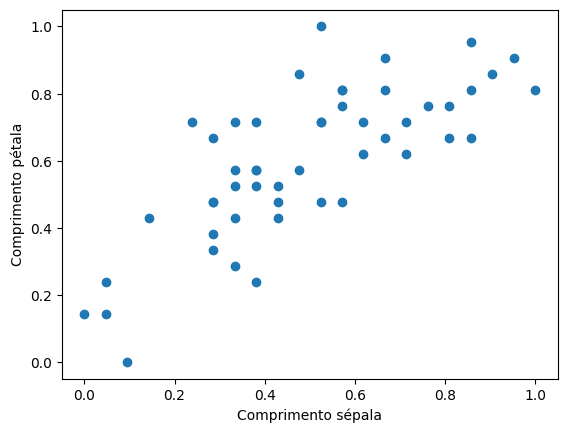

In [74]:
plt.scatter(x_train, y_train)
plt.xlabel("Comprimento sépala")
plt.ylabel("Comprimento pétala")
plt.show()

In [75]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

x_train_bias


array([[1.        , 1.        ],
       [1.        , 0.71428573],
       [1.        , 0.95238101],
       [1.        , 0.28571424],
       [1.        , 0.76190478],
       [1.        , 0.38095227],
       [1.        , 0.66666675],
       [1.        , 0.        ],
       [1.        , 0.80952376],
       [1.        , 0.14285702],
       [1.        , 0.047619  ],
       [1.        , 0.47619051],
       [1.        , 0.52380949],
       [1.        , 0.57142848],
       [1.        , 0.33333325],
       [1.        , 0.85714275],
       [1.        , 0.33333325],
       [1.        , 0.42857149],
       [1.        , 0.61904752],
       [1.        , 0.33333325],
       [1.        , 0.47619051],
       [1.        , 0.57142848],
       [1.        , 0.66666675],
       [1.        , 0.57142848],
       [1.        , 0.71428573],
       [1.        , 0.80952376],
       [1.        , 0.90476197],
       [1.        , 0.85714275],
       [1.        , 0.52380949],
       [1.        , 0.38095227],
       [1.

In [76]:
print('x_train_bias.shape:',x_train_bias.shape, x_train_bias.dtype)


x_train_bias.shape: (50, 2) float64


In [77]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)
print(y_train)

tensor([[0.8095],
        [0.7143],
        [0.9048],
        [0.4762],
        [0.7619],
        [0.7143],
        [0.8095],
        [0.1429],
        [0.7619],
        [0.4286],
        [0.2381],
        [0.5714],
        [0.4762],
        [0.8095],
        [0.2857],
        [0.6667],
        [0.7143],
        [0.5238],
        [0.7143],
        [0.4286],
        [0.8571],
        [0.4762],
        [0.9048],
        [0.8095],
        [0.6190],
        [0.6667],
        [0.8571],
        [0.9524],
        [0.7143],
        [0.2381],
        [0.3810],
        [0.3333],
        [0.4286],
        [1.0000],
        [0.7143],
        [0.7143],
        [0.8095],
        [0.6667],
        [0.5238],
        [0.4762],
        [0.6667],
        [0.7619],
        [0.4762],
        [0.1429],
        [0.5714],
        [0.5714],
        [0.5714],
        [0.6190],
        [0.0000],
        [0.5238]])


# Inicialização

In [78]:
model = torch.nn.Linear(in_features=2, out_features=1, bias=False)

model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight


/tmp/ipython-input-4123442090.py:4: FutureWarning: `nn.init.uniform` is now deprecated in favor of `nn.init.uniform_`.
  torch.nn.init.uniform(model.weight.data, -0.1, 0.1)


Parameter containing:
tensor([[-0.0480, -0.0267]], requires_grad=True)

In [79]:
xx = torch.ones((5,2))
xx

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [80]:
model(Variable(xx))


tensor([[-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747]], grad_fn=<MmBackward0>)

# Treinamento

In [81]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = torch.Tensor(n_out, n_in)
        self.w.uniform_(-0.1, 0.1)

    def forward(self, x_bias):
        return x_bias.matmul(self.w.t())


In [82]:
model = Net(2, 1)
print(model.w)

tensor([[-0.0883,  0.0401]])


In [83]:
# Exercício 3
w0_list = []
w1_list = []


In [84]:
w0_list.append(model.w[0,0].item())
w1_list.append(model.w[0,1].item())


In [85]:
num_epochs = 100
learning_rate = 0.5

w0_list = []
w1_list = []

for epoch in range(num_epochs):

    # forward
    y_pred = model.forward(x_train_bias)

    # loss (MSE)
    loss = torch.mean((y_pred - y_train) ** 2)

    # gradiente
    w_grad = (2.0 / n_samples) * x_train_bias.t().matmul(y_pred - y_train)

    # atualização dos pesos
    model.w = model.w - learning_rate * w_grad.t()

    # salvar evolução dos pesos (Atividade 3)
    w0_list.append(model.w[0,0].item())
    w1_list.append(model.w[0,1].item())

    # verbose
    if (epoch+1) % 20 == 0:
        print("Epoch [{}/{}], Loss: {:.6f}".format(epoch+1, num_epochs, loss.item()))


Epoch [20/100], Loss: 0.022454
Epoch [40/100], Loss: 0.021355
Epoch [60/100], Loss: 0.021196
Epoch [80/100], Loss: 0.021173
Epoch [100/100], Loss: 0.021170


# Exercício 1: Por que no final da varredura do laço de treinamento, a perda é impressa utilizando loss.data? Por que precisa do data?

## Resposta:
No código original do notebook 2.5, a perda tinha saída utilizando loss.data. Isso acontecia porque, nas versões antigas do PyTorch (anteriores à 0.4), o valor de "loss" não era um número comum. Ele era um tensor especial chamado Variable, que fazia parte do grafo computacional usado para calcular gradientes automaticamente.

Esse objeto Variable continha duas partes principais:


1.   loss.data → o valor numérico bruto da perda (um tensor comum)
2.   loss.grad → o gradiente calculado pelo backpropagation

Como loss fazia parte do grafo computacional, não era recomendado acessar diretamente o valor usando apenas loss, pois isso poderia interferir no grafo ou imprimir informações indesejadas.

Por isso, usava-se loss.data, que retorna somente o valor numérico da perda, desconectado do grafo.

# Parâmetros ótimos, solução analítica

In [87]:
x_bias = x_train_bias
y = y_train
x_bias_t = torch.t(x_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_bias)).mm(x_bias_t)).mm(y)
print(torch.t(w_opt))

tensor([[0.2613, 0.6865]])


# Exercício 2 - MSE final com pesos treinados

In [88]:
y_pred_final = model.forward(x_train_bias)
mse_final = torch.mean((y_pred_final - y_train) ** 2)

print("MSE final com pesos treinados:", mse_final.item())


MSE final com pesos treinados: 0.021169934421777725


# Plot evolução dos pesos (Continuação 3)

In [95]:
print("Evolução dos pesos durante o treinamento:\n")

for epoch, (w0, w1) in enumerate(zip(w0_list, w1_list)):
    print(f"Época {epoch+1:03d} | w0 = {w0:.6f} | w1 = {w1:.6f}")


Evolução dos pesos durante o treinamento:

Época 001 | w0 = 0.580203 | w1 = 0.408211
Época 002 | w0 = 0.398616 | w1 = 0.335103
Época 003 | w0 = 0.434682 | w1 = 0.373700
Época 004 | w0 = 0.415642 | w1 = 0.382824
Época 005 | w0 = 0.411140 | w1 = 0.398582
Época 006 | w0 = 0.403366 | w1 = 0.411792
Época 007 | w0 = 0.396849 | w1 = 0.424840
Época 008 | w0 = 0.390412 | w1 = 0.437154
Época 009 | w0 = 0.384337 | w1 = 0.448919
Época 010 | w0 = 0.378534 | w1 = 0.460120
Época 011 | w0 = 0.373007 | w1 = 0.470796
Época 012 | w0 = 0.367741 | w1 = 0.480967
Época 013 | w0 = 0.362723 | w1 = 0.490659
Época 014 | w0 = 0.357942 | w1 = 0.499893
Época 015 | w0 = 0.353386 | w1 = 0.508693
Época 016 | w0 = 0.349045 | w1 = 0.517077
Época 017 | w0 = 0.344909 | w1 = 0.525065
Época 018 | w0 = 0.340968 | w1 = 0.532677
Época 019 | w0 = 0.337212 | w1 = 0.539931
Época 020 | w0 = 0.333634 | w1 = 0.546842
Época 021 | w0 = 0.330225 | w1 = 0.553427
Época 022 | w0 = 0.326976 | w1 = 0.559701
Época 023 | w0 = 0.323881 | w1 = 

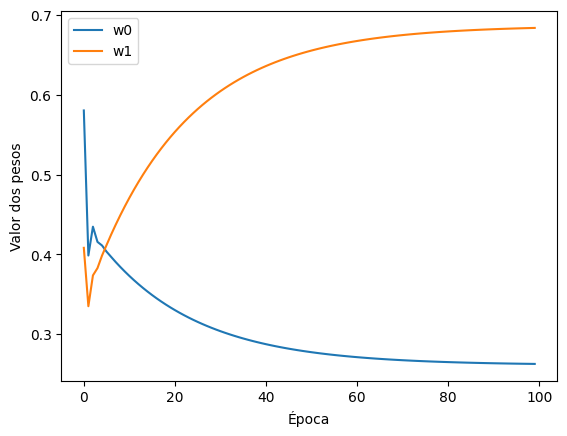

In [89]:
plt.plot(w0_list, label="w0")
plt.plot(w1_list, label="w1")
plt.xlabel("Época")
plt.ylabel("Valor dos pesos")
plt.legend()
plt.show()


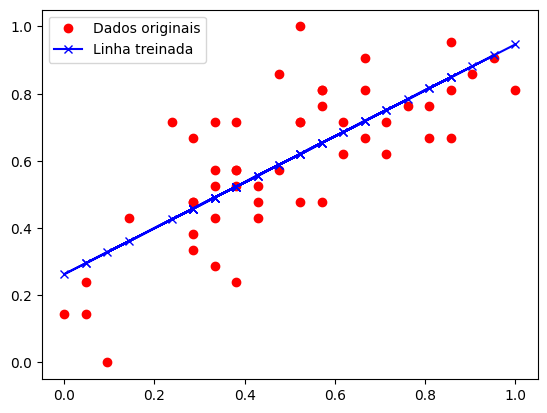

In [93]:
y_pred = model.forward(x_train_bias)

plt.plot(x_train, y_train, 'ro', label='Dados originais')
plt.plot(x_train, y_pred.detach().numpy(), 'bx-', label='Linha treinada')
plt.legend()
plt.show()
